In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [9]:
def apply_convolution(image_path, kernel):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        raise ValueError("¡Image was not uploaded: verify path.")

    filtered_image = cv2.filter2D(image, -1, kernel)

    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title("Original Image")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(filtered_image, cmap='gray')
    plt.title("Filtered Image")
    plt.axis('off')

    plt.show()

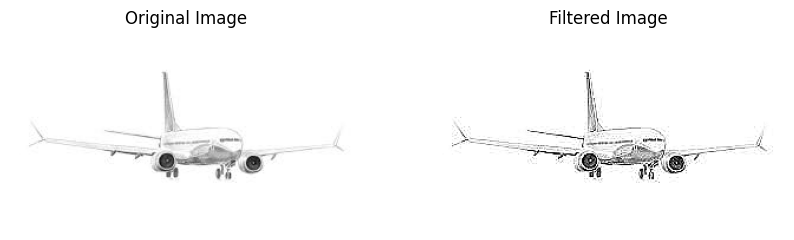

In [14]:
# define and apply filters
kernels = {
    "Enfoque": np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
}

image_path = "/plane.png"
apply_convolution(image_path, kernels["Enfoque"])

In [12]:
def apply_all_filters(image_path, kernels):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        raise ValueError("¡Image was not uploaded: verify path.")

    fig, axes = plt.subplots(1, len(kernels) + 1, figsize=(15, 5))

    # Original image
    axes[0].imshow(image, cmap='gray')
    axes[0].set_title("Original Image")
    axes[0].axis('off')

    # aply each kernel filter
    for i, (name, kernel) in enumerate(kernels.items(), 1):
        filtered = cv2.filter2D(image, -1, kernel)
        axes[i].imshow(filtered, cmap='gray')
        axes[i].set_title(name)
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

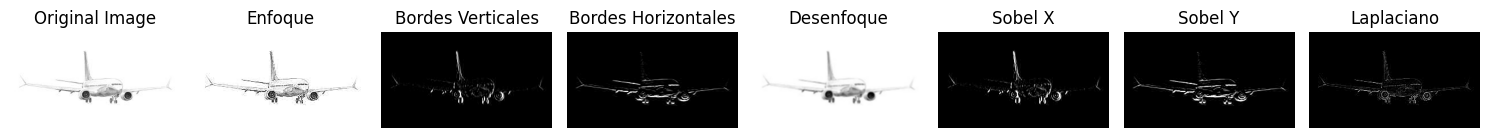

In [13]:
# define all additional kernels
kernels.update({
    "Bordes Verticales": np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]]),
    "Bordes Horizontales": np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]]),
    "Desenfoque": np.ones((3, 3)) / 9.0,
    "Sobel X": np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]),
    "Sobel Y": np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]]),
    "Laplaciano": np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])
})

# apply filters
apply_all_filters(image_path, kernels)